In [2]:
# import all necessary libraries
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd
import csv
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [3]:
df = pd.read_csv('Table4.csv')

In [4]:
df

,Team,Game,Game outcome,Number of top players (In Top 100),Top scorer (weighted goals) contribution,Top player ratings (total),Total assists (In Top 100),Team Versatility score,FIFA 20 rating (sum),Num top players metric,...,Total assists metric,Team Versatility metric,FIFA 20 rating metric,Ignore,Number of top players (In Top 100).1,Top scorer (weighted goals) contribution.1,Top player ratings (total).1,Total assists (In Top 100).1,Team Versatility score.1,FIFA 20 rating (sum).1
0,Everton,8,0,5,31,35.68,15,52,235,0,...,0,0,1,10.0,0.5,0.392405,0.493499,0.263158,0.52,0.917969
1,Leicester,9,1,7,33,49.62,21,58,233,1,...,1,1,0,79.0,0.7,0.417722,0.686307,0.368421,0.58,0.910156
2,Arsenal,5,1,6,48,42.20,22,64,248,1,...,1,0,1,72.3,0.6,0.607595,0.583679,0.385965,0.64,0.968750
3,Fulham,19,0,1,11,7.03,3,70,220,0,...,0,1,0,57.0,0.1,0.139241,0.097234,0.052632,0.70,0.859375
4,Cardiff,18,0,3,9,20.99,5,85,216,0,...,0,1,0,100.0,0.3,0.113924,0.290318,0.087719,0.85,0.843750
5,Tottenham,4,1,7,54,56.42,28,76,251,1,...,1,0,1,256.0,0.7,0.683544,0.780360,0.491228,0.76,0.980469
6,Chelsea,3,0,9,43,56.92,34,82,242,1,...,1,1,1,256.0,0.9,0.544304,0.787275,0.596491,0.82,0.945312
7,Southampton,16,1,3,6,21.02,5,46,228,0,...,0,0,0,256.0,0.3,0.075949,0.290733,0.087719,0.46,0.890625
8,Bournemouth,14,0,4,36,34.96,18,79,232,1,...,1,0,0,256.0,0.4,0.455696,0.483541,0.315789,0.79,0.906250
9,Watford,11,1,3,13,21.24,14,94,233,0,...,0,1,1,256.0,0.3,0.164557,0.293776,0.245614,0.94,0.910156


In [5]:

#X = df.iloc[0:,16:]
X = df.iloc[0:,9:15]
Y = df.iloc[0:,2]
#Y
X



,Num top players metric,Top scorer metric,Top player ratings metric,Total assists metric,Team Versatility metric,FIFA 20 rating metric
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,0,1
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,1,1,1,0,1
6,1,1,1,1,1,1
7,0,0,0,0,0,0
8,1,1,1,1,0,0
9,0,0,0,0,1,1


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, random_state = 90)

In [25]:
# Define the model
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=6))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# compile the keras model
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=10, epochs=150, validation_data = (X_test, Y_test))

Train on 250 samples, validate on 108 samples
Epoch 1/150
250/250 [==============================] - 0s 1ms/step - loss: 0.7005 - acc: 0.5600 - val_loss: 0.7022 - val_acc: 0.4907
Epoch 2/150
250/250 [==============================] - 0s 134us/step - loss: 0.6934 - acc: 0.5760 - val_loss: 0.6990 - val_acc: 0.4907
Epoch 3/150
250/250 [==============================] - 0s 121us/step - loss: 0.6857 - acc: 0.6200 - val_loss: 0.6968 - val_acc: 0.5278
Epoch 4/150
250/250 [==============================] - 0s 122us/step - loss: 0.6807 - acc: 0.6640 - val_loss: 0.6957 - val_acc: 0.5278
Epoch 5/150
250/250 [==============================] - 0s 125us/step - loss: 0.6766 - acc: 0.6640 - val_loss: 0.6950 - val_acc: 0.5278
Epoch 6/150
250/250 [==============================] - 0s 121us/step - loss: 0.6708 - acc: 0.6640 - val_loss: 0.6928 - val_acc: 0.5278
Epoch 7/150
250/250 [==============================] - 0s 127us/step - loss: 0.6652 - acc: 0.6640 - val_loss: 0.6910 - val_acc: 0.5278
Epoch 8/150

In [24]:
y_predict = model.predict(X_test)
y_predict = (y_predict)
len(y_predict)

108

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
cm


array([[36, 21],
       [16, 35]])

In [18]:
cl = LogisticRegression()
cl.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = cl.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(cl.score(X, Y)))

Accuracy of logistic regression classifier on test set: 0.69


In [20]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [21]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
cl.score(X_test, Y_test)

0.6574074074074074

In [22]:
df.corr()

,Game,Game outcome,Number of top players (In Top 100),Top scorer (weighted goals) contribution,Top player ratings (total),Total assists (In Top 100),Team Versatility score,FIFA 20 rating (sum),Num top players metric,Top scorer metric,...,Total assists metric,Team Versatility metric,FIFA 20 rating metric,Ignore,Number of top players (In Top 100).1,Top scorer (weighted goals) contribution.1,Top player ratings (total).1,Total assists (In Top 100).1,Team Versatility score.1,FIFA 20 rating (sum).1
Game,1.000000,-0.304343,-0.896099,-0.893210,-0.902340,-0.879918,-0.230174,-0.943017,-0.552573,-0.557884,...,-0.562553,-0.149510,-0.599578,-0.019214,-0.896099,-0.893210,-0.902340,-0.879918,-0.230174,-0.943017
Game outcome,-0.304343,1.000000,0.290888,0.301381,0.289678,0.317318,0.099073,0.309703,0.308207,0.284934,...,0.380179,0.117318,0.329691,0.029013,0.290888,0.301381,0.289678,0.317318,0.099073,0.309703
Number of top players (In Top 100),-0.896099,0.290888,1.000000,0.877213,0.976607,0.828643,0.183901,0.833813,0.588016,0.524762,...,0.506234,0.128078,0.524253,0.019498,1.000000,0.877213,0.976607,0.828643,0.183901,0.833813
Top scorer (weighted goals) contribution,-0.893210,0.301381,0.877213,1.000000,0.929065,0.929441,0.296652,0.907740,0.536770,0.588383,...,0.559863,0.188330,0.548973,0.015621,0.877213,1.000000,0.929065,0.929441,0.296652,0.907740
Top player ratings (total),-0.902340,0.289678,0.976607,0.929065,1.000000,0.867816,0.219558,0.870430,0.588395,0.549689,...,0.527743,0.143037,0.541007,0.024858,0.976607,0.929065,1.000000,0.867816,0.219558,0.870430
Total assists (In Top 100),-0.879918,0.317318,0.828643,0.929441,0.867816,1.000000,0.447078,0.841303,0.495540,0.541456,...,0.585204,0.274785,0.507470,0.043153,0.828643,0.929441,0.867816,1.000000,0.447078,0.841303
Team Versatility score,-0.230174,0.099073,0.183901,0.296652,0.219558,0.447078,1.000000,0.196893,0.116905,0.161921,...,0.244767,0.597822,0.108788,0.048513,0.183901,0.296652,0.219558,0.447078,1.000000,0.196893
FIFA 20 rating (sum),-0.943017,0.309703,0.833813,0.907740,0.870430,0.841303,0.196893,1.000000,0.517676,0.546312,...,0.529031,0.127554,0.594815,0.038410,0.833813,0.907740,0.870430,0.841303,0.196893,1.000000
Num top players metric,-0.552573,0.308207,0.588016,0.536770,0.588395,0.495540,0.116905,0.517676,1.000000,0.710845,...,0.681112,0.106471,0.710101,0.018691,0.588016,0.536770,0.588395,0.495540,0.116905,0.517676
Top scorer metric,-0.557884,0.284934,0.524762,0.588383,0.549689,0.541456,0.161921,0.546312,0.710845,1.000000,...,0.771151,0.195543,0.731822,0.027637,0.524762,0.588383,0.549689,0.541456,0.161921,0.546312


In [69]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [62]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[34, 23],
       [16, 35]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


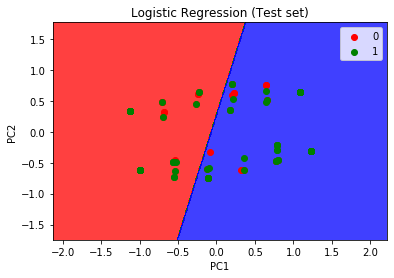

In [65]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                     X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [70]:
# Fit a support vector cclassifier to the training set
from sklearn.svm import SVC
cf = SVC(kernel='poly', random_state=0)
cf.fit(X_set, Y_set)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


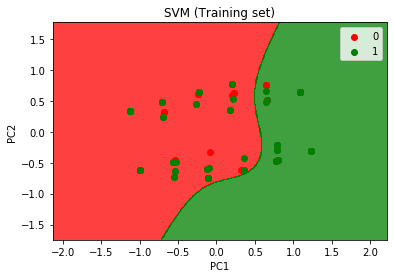

In [72]:
X_set1, Y_set1 = X_set, Y_set
X1a, X2a = np.meshgrid(np.arange(start = X_set1[:,0].min() - 1,
                               stop = X_set1[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set1[:, 1].min() - 1,
                              stop = X_set1[:, 1].max() + 1, step = 0.01))
plt.contourf(X1a, X2a, cf.predict(np.array([X1.ravel(),
                                                     X2a.ravel()]).T).reshape(X1a.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1a.min(), X1a.max())
plt.ylim(X2a.min(), X2a.max())
for i, j in enumerate(np.unique(Y_set1)):
    plt.scatter(X_set1[Y_set1 == j, 0], X_set1[Y_set1 == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [83]:
# Predicting the test set results of SVM
y_preda = cf.predict(X_set1)

In [84]:
cm1 = confusion_matrix(Y_set1,y_preda)

In [85]:
cm1

array([[94, 28],
       [52, 76]])

ValueError: X has 2 features per sample; expecting 6